#EDA

In [33]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
from sklearn import preprocessing
from tqdm import tqdm

fTrain = "dataTransaksi_PeDaS_2024_Train.csv"
dfTrain = pd.read_csv(fTrain)
print(len(dfTrain.trx_code.unique()), len(dfTrain.trx_id.unique()), len(dfTrain.rek_code.unique()))
dfTrain.info()

16615 16615 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16029 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [34]:
dfTrain.head()

,trx_code,trx_id,rek_code,rek,creationdate,type,amount,balance
0,50261,100085,1922,2526,2022-02-07 16:41:44+07:00,5,-100000.0,37.14
1,50260,100001,1922,2526,2022-02-07 16:02:58+07:00,5,-100000.0,100037.14
2,154447,775749,2346,9437,2022-03-07 08:53:06+07:00,5,-1000000.0,1679999.69
3,50285,564858,2346,9437,2022-03-03 18:41:16+07:00,1,100000.0,2609999.69
4,154240,565293,2212,5908,2022-03-03 20:22:31+07:00,1,100000.0,1200526.93


In [35]:
df_amount_null = dfTrain[dfTrain['amount'].isnull()]
df_amount_null['type'].value_counts()

,count
type,
4,586


In [36]:
df_amount_null.head()

,trx_code,trx_id,rek_code,rek,creationdate,type,amount,balance
39,116748,5116071,1922,2526,2022-06-01 00:04:02+07:00,4,NaN,4509831.00
43,116151,5084823,5614,1207,2022-06-01 00:00:35+07:00,4,NaN,10979654.21
52,45923,80294,1922,2526,2022-02-01 00:15:31+07:00,4,NaN,200000.00
55,45926,80306,2346,9437,2022-02-01 00:15:31+07:00,4,NaN,0.00
65,394787,306820463,1035,6672,2024-06-01 00:30:25+07:00,4,NaN,73771.32


#Pre Processing

In [37]:
!pip install darts

In [38]:
dfTrain_amount=dfTrain.copy()

In [39]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16029 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [40]:
dfTrain_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16029 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [41]:
from darts import TimeSeries
from darts.dataprocessing.transformers import MissingValuesFiller
dfTrain_amount['amount'] = dfTrain_amount['amount'].astype(float)
series_amount = TimeSeries.from_dataframe(dfTrain_amount, value_cols='amount')
transformer = MissingValuesFiller()
series_amount_filled = transformer.transform(series_amount)
print(series_amount_filled)

<TimeSeries (DataArray) (time: 16615, component: 1, sample: 1)> Size: 133kB
array([[[ -100000.]],

       [[ -100000.]],

       [[-1000000.]],

       ...,

       [[ -100000.]],

       [[ -100000.]],

       [[  -25000.]]])
Coordinates:
  * time       (time) int64 133kB 0 1 2 3 4 5 ... 16610 16611 16612 16613 16614
  * component  (component) object 8B 'amount'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [42]:
# (Optional) Convert back to DataFrame if needed
df_filled_amount = series_amount_filled.pd_dataframe()
df_filled_amount.head()

component,amount
time,
0,-100000.0
1,-100000.0
2,-1000000.0
3,100000.0
4,100000.0


In [43]:
dfTrain_amount['amount'].update(df_filled_amount['amount'])

In [44]:
dfTrain_amount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16615 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [45]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16029 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


In [46]:
unique_rek_count = dfTrain_amount['rek'].nunique()
print(f"Number of unique values in rek: {unique_rek_count}")

Number of unique values in rek: 35


In [47]:
dfTrain.head(50)

,trx_code,trx_id,rek_code,rek,creationdate,type,amount,balance
0,50261,100085,1922,2526,2022-02-07 16:41:44+07:00,5,-100000.00,37.14
1,50260,100001,1922,2526,2022-02-07 16:02:58+07:00,5,-100000.00,100037.14
2,154447,775749,2346,9437,2022-03-07 08:53:06+07:00,5,-1000000.00,1679999.69
3,50285,564858,2346,9437,2022-03-03 18:41:16+07:00,1,100000.00,2609999.69
4,154240,565293,2212,5908,2022-03-03 20:22:31+07:00,1,100000.00,1200526.93
5,23623,562983,2346,9437,2022-03-03 10:48:20+07:00,1,1960000.00,2561201.69
6,23624,562986,2346,9437,2022-03-03 10:48:39+07:00,5,-1202.00,2559999.69
7,23626,564222,2346,9437,2022-03-03 16:03:43+07:00,5,-50000.00,2509999.69
8,23406,105839,2212,5908,2022-02-09 17:37:58+07:00,5,-50000.00,550000.00
9,23407,105845,2212,5908,2022-02-09 17:38:16+07:00,5,-450000.00,100000.00


In [48]:
dfTrain_amount.head(50)

,trx_code,trx_id,rek_code,rek,creationdate,type,amount,balance
time,,,,,,,,
0,50261,100085,1922,2526,2022-02-07 16:41:44+07:00,5,-100000.000,37.14
1,50260,100001,1922,2526,2022-02-07 16:02:58+07:00,5,-100000.000,100037.14
2,154447,775749,2346,9437,2022-03-07 08:53:06+07:00,5,-1000000.000,1679999.69
3,50285,564858,2346,9437,2022-03-03 18:41:16+07:00,1,100000.000,2609999.69
4,154240,565293,2212,5908,2022-03-03 20:22:31+07:00,1,100000.000,1200526.93
5,23623,562983,2346,9437,2022-03-03 10:48:20+07:00,1,1960000.000,2561201.69
6,23624,562986,2346,9437,2022-03-03 10:48:39+07:00,5,-1202.000,2559999.69
7,23626,564222,2346,9437,2022-03-03 16:03:43+07:00,5,-50000.000,2509999.69
8,23406,105839,2212,5908,2022-02-09 17:37:58+07:00,5,-50000.000,550000.00


In [49]:
dfTrain = dfTrain_amount.copy()

In [50]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16615 entries, 0 to 16614
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      16615 non-null  int64  
 1   trx_id        16615 non-null  int64  
 2   rek_code      16615 non-null  int64  
 3   rek           16615 non-null  int64  
 4   creationdate  16615 non-null  object 
 5   type          16615 non-null  int64  
 6   amount        16615 non-null  float64
 7   balance       16615 non-null  float64
dtypes: float64(2), int64(5), object(1)
memory usage: 1.0+ MB


#Loop Rek

In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape
from pytorch_lightning.callbacks import EarlyStopping, TQDMProgressBar

# Assuming you have your dfTrain_amount DataFrame loaded

dfTrain = dfTrain_amount.copy()

# Function to calculate MAPE safely
def safe_mape(actual_series, pred_series):
    """Calculates MAPE, ignoring zero/negative values in actual_series."""
    # Create a mask for valid (positive) values in actual_series
    mask = actual_series.values() > 0

    # Apply the mask to both actual_series and pred_series
    filtered_actual = actual_series[mask]
    filtered_pred = pred_series[mask]

    # Calculate MAPE only on the filtered data
    if len(filtered_actual) > 0:  # Check if any valid values remain
        return mape(filtered_actual, filtered_pred)
    else:
        return float('nan')  # Or any other appropriate value for this case

# Get unique 'rek' values
unique_reks = dfTrain['rek'].unique()
results = {}

# Early stopping and progress bar callbacks
early_stopping = EarlyStopping(monitor="train_loss", patience=5)
progress_bar = TQDMProgressBar()

# Loop through each 'rek'
for rek in unique_reks:
    # Filter data for the current 'rek' value
    df_rek = dfTrain[dfTrain['rek'] == rek].copy()

    # Ensure 'creationdate' is a datetime object and set it as the index
    df_rek['creationdate'] = pd.to_datetime(df_rek['creationdate'])
    df_rek = df_rek.sort_values(by='creationdate').set_index('creationdate')

    # Resample and preprocess
    df_rek.index = df_rek.index.tz_localize(None)  # Remove timezone if present
    df_rek_resampled = df_rek.resample('D').mean().fillna(method='ffill')

    # Create TimeSeries objects and differencing
    ts_type = TimeSeries.from_dataframe(df_rek_resampled, value_cols='type')
    ts_balance = TimeSeries.from_dataframe(df_rek_resampled, value_cols='balance')
    ts_type_diff = ts_type.diff()
    ts_balance_diff = ts_balance.diff()

    # Split data into training and validation
    train_type, val_type = ts_type_diff.split_before(0.8)
    train_balance, val_balance = ts_balance_diff.split_before(0.8)

    # Initialize and fit the NBEATS model
    model = NBEATSModel(
        input_chunk_length=24,
        output_chunk_length=12,
        random_state=42,
        batch_size=2048,  # Adjust if needed
        n_epochs=1,  # Adjust if needed
        num_blocks=1,
        num_layers=1,
        layer_widths=8,
        pl_trainer_kwargs={"callbacks": [early_stopping, progress_bar]}
    )
    model.fit([train_type, train_balance], verbose=False)

    # Make predictions
    pred_type = model.predict(24, series=train_type)
    pred_balance = model.predict(24, series=train_balance)

    # Calculate MAPE using the safe_mape function
    mape_type = safe_mape(val_type, pred_type)
    mape_balance = safe_mape(val_balance, pred_balance)

    # Store results for this 'rek'
    results[rek] = {
        "pred_type": pred_type,
        "pred_balance": pred_balance,
        "mape_type": mape_type,
        "mape_balance": mape_balance
    }

# You can now access predictions and MAPE for each 'rek' in

#Resampling

In [51]:
dfTrain['creationdate'] = pd.to_datetime(dfTrain['creationdate'])
dfTrain = dfTrain.sort_values(by='creationdate')
dfTrain.set_index('creationdate', inplace=True)

In [52]:
dfTrain.head()

,trx_code,trx_id,rek_code,rek,type,amount,balance
creationdate,,,,,,,
2022-01-26 15:41:53+07:00,19359,34925,2346,9437,1,425600.00,425600.00
2022-01-28 11:06:56+07:00,154824,39431,1922,2526,1,200000.00,200000.00
2022-01-29 14:03:57+07:00,45742,43604,2346,9437,5,-425600.00,0.00
2022-02-01 00:15:31+07:00,45923,80294,1922,2526,4,-49976.79,200000.00
2022-02-01 00:15:31+07:00,45925,80300,1922,2526,7,-9.28,200037.14


In [53]:
# Remove timezone information
dfTrain.index = dfTrain.index.tz_localize(None)

# Resample to a consistent frequency (e.g., daily)
dfTrain_resampled = dfTrain.resample('D').mean()

# Fill missing values after resampling
dfTrain_resampled.fillna(method='ffill', inplace=True)

In [54]:
from darts import TimeSeries

# Create TimeSeries with fixed frequency
ts_type = TimeSeries.from_dataframe(
    dfTrain_resampled,
    value_cols='type',
    fill_missing_dates=True,
    freq='D'  # Replace 'D' with the appropriate frequency
)

ts_balance = TimeSeries.from_dataframe(
    dfTrain_resampled,
    value_cols='balance',
    fill_missing_dates=True,
    freq='D'  # Same frequency as above
)

In [55]:
# Check for duplicate timestamps
print(dfTrain.index.duplicated().sum())  # Number of duplicates

# Check unique time differences
time_diffs = dfTrain.index.to_series().diff().dt.total_seconds()
print(time_diffs.describe())
print(time_diffs.unique())  # Unique intervals

1104
count     16614.000000
mean       5196.708980
std       22559.731269
min           0.000000
25%          16.000000
50%         363.500000
75%        3443.000000
max      849558.000000
Name: creationdate, dtype: float64
[    nan 156303.  97021. ...   6697.   1911.   2757.]


In [56]:
# Set a specific frequency (e.g., '5S' for 5 seconds)
dfTrain_resampled = dfTrain.resample('5S').mean()
dfTrain_resampled.fillna(method='ffill', inplace=True)

# Create TimeSeries
ts_type = TimeSeries.from_dataframe(dfTrain_resampled, value_cols='type')
ts_balance = TimeSeries.from_dataframe(dfTrain_resampled, value_cols='balance')

KeyboardInterrupt: 

In [ ]:
ts_balance.plot(label="Balance")

In [ ]:
# ts_type.plot(label="Type")

#Differencing

In [27]:
import matplotlib.pyplot as plt

# First differencing on 'type' column
ts_type_diff = ts_type.diff()
ts_balance_diff = ts_balance.diff()

# # Plot the differenced series
# plt.figure(figsize=(12, 6))
# plt.subplot(2, 1, 1)
# ts_type_diff.plot(label="Differenced Type")
# plt.legend()
# plt.title("First Differencing - Type")

# plt.subplot(2, 1, 2)
# ts_balance_diff.plot(label="Differenced Balance")
# plt.legend()
# plt.title("First Differencing - Balance")
# plt.tight_layout()
# plt.show()

# # Optionally drop missing values created by differencing
# ts_type_diff = ts_type_diff.dropna()
# ts_balance_diff = ts_balance_diff.dropna()

<Axes: xlabel='creationdate'>

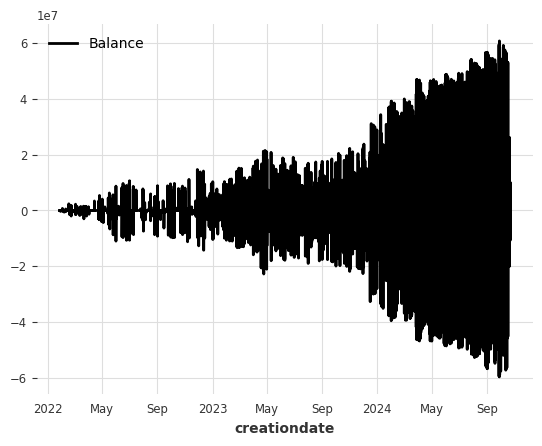

In [28]:
ts_balance_diff.plot(label="Balance")

#Modelling

In [ ]:
from darts.models import NBEATSModel
from darts.metrics import mae, mape
from darts.utils.callbacks import TFMProgressBar

In [ ]:
train_type, val_type = ts_type.split_before(0.8)
train_balance, val_balance = ts_balance.split_before(0.8)

In [ ]:
!pip install u8darts[all]

In [ ]:
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks import TQDMProgressBar

# Define early stopping callback
early_stopping = EarlyStopping(
    monitor="train_loss",
    patience=1,  # Stop training if no improvement for 2 epochs
    min_delta=0.1  # Minimum improvement threshold
)

# Define progress bar callback
progress_bar = TQDMProgressBar(refresh_rate=50)

# NBEATS Model with progress bar and early stopping
model = NBEATSModel(
    input_chunk_length=24,
    output_chunk_length=12,
    random_state=42,
    batch_size=2048,
    n_epochs=1,
    num_blocks=1,
    num_layers=1,
    layer_widths=8,
    pl_trainer_kwargs={
        "callbacks": [early_stopping, progress_bar]
    }
)

# Fit the model
model.fit([train_type, train_balance], verbose=False)

In [ ]:
pred_type = model.predict(24, series=train_type)  # Predict next 24 steps for 'type'
pred_balance = model.predict(24, series=train_balance)  # Predict next 24 steps for 'balance'
train_balance.plot(label="Train - Balance")
pred_balance.plot(label="Prediction - Balance", color="blue")

In [ ]:
from darts.metrics import smape

mape_type = smape(val_type, pred_type)
mape_balance = smape(val_balance, pred_balance)

print(f"sMAPE for Type: {mape_type}%")
print(f"sMAPE for Balance: {mape_balance}%")

#Test Data

In [119]:
fTest = "dataTransaksi_PeDaS_2024_Test_Peserta.csv"
dfTest = pd.read_csv(fTest)
print(len(dfTest.trx_code.unique()), len(dfTest.trx_id.unique()), len(dfTest.rek_code.unique()))
dfTest.info()

35 35 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trx_code      35 non-null     int64  
 1   trx_id        35 non-null     int64  
 2   rek_code      35 non-null     int64  
 3   rek           35 non-null     int64  
 4   creationdate  35 non-null     object 
 5   type          0 non-null      float64
 6   balance       0 non-null      float64
dtypes: float64(2), int64(4), object(1)
memory usage: 2.0+ KB


In [120]:
dfTest.head()

,trx_code,trx_id,rek_code,rek,creationdate,type,balance
0,233822,371848437,1922,2526,2024-10-21 20:02:14+07:00,NaN,NaN
1,281563,370918907,2346,9437,2024-10-17 08:23:41+07:00,NaN,NaN
2,310541,370287760,2212,5908,2024-10-14 07:44:47+07:00,NaN,NaN
3,37018,370872355,3799,7665,2024-10-16 23:04:24+07:00,NaN,NaN
4,142422,362772092,7868,825,2024-10-01 00:13:21+07:00,NaN,NaN


#Resampling

In [121]:
dfTest['creationdate'] = pd.to_datetime(dfTest['creationdate'])
dfTest = dfTest.sort_values(by='creationdate')
dfTest.set_index('creationdate', inplace=True)

In [122]:
dfTest.head()

,trx_code,trx_id,rek_code,rek,type,balance
creationdate,,,,,,
2024-06-06 18:51:53+07:00,128215,312221200,11465,7639,NaN,NaN
2024-10-01 00:11:37+07:00,576302,362740207,2604,13082,NaN,NaN
2024-10-01 00:13:21+07:00,142422,362772092,7868,825,NaN,NaN
2024-10-01 17:24:45+07:00,355943,367221236,10641,8538,NaN,NaN
2024-10-11 19:35:40+07:00,290007,369802962,18084,6376,NaN,NaN


In [123]:
# Remove timezone information
dfTest.index = dfTest.index.tz_localize(None)

# Resample to a consistent frequency (e.g., daily)
dfTest_resampled = dfTest.resample('D').mean()

In [124]:
from darts import TimeSeries

# Create TimeSeries with fixed frequency
ts_type = TimeSeries.from_dataframe(
    dfTest_resampled,
    value_cols='type',
    fill_missing_dates=True,
    freq='D'  # Replace 'D' with the appropriate frequency
)

ts_balance = TimeSeries.from_dataframe(
    dfTest_resampled,
    value_cols='balance',
    fill_missing_dates=True,
    freq='D'  # Same frequency as above
)

In [125]:
# Check for duplicate timestamps
print(dfTest.index.duplicated().sum())  # Number of duplicates

# Check unique time differences
time_diffs = dfTest.index.to_series().diff().dt.total_seconds()
print(time_diffs.describe())
print(time_diffs.unique())  # Unique intervals

0
count    3.400000e+01
mean     3.486631e+05
std      1.719443e+06
min      1.000000e+00
25%      2.125000e+01
50%      1.126950e+04
75%      3.306750e+04
max      1.004158e+07
Name: creationdate, dtype: float64
[          nan 1.0041584e+07 1.0400000e+02 6.1884000e+04 8.7185500e+05
 2.1654700e+05 8.4186000e+04 7.9880000e+03 2.8158000e+04 1.3000000e+01
 1.0763200e+05 3.3557000e+04 2.2874000e+04 1.5891300e+05 2.2159000e+04
 4.1100000e+03 1.7249000e+04 2.9462000e+04 3.1599000e+04 5.4654000e+04
 2.0000000e+01 2.0000000e+00 4.0000000e+00 5.0000000e+00 6.0000000e+00
 3.3000000e+01 1.0000000e+01 2.2000000e+01 2.1000000e+01 1.0000000e+00
 1.0381000e+04 2.3830000e+04 1.2158000e+04 5.2950000e+03 8.2280000e+03]


In [ ]:
# Set a specific frequency (e.g., '5S' for 5 seconds)
dfTest_resampled = dfTrain.resample('5S').mean()

# Create TimeSeries
ts_type = TimeSeries.from_dataframe(dfTrain_resampled, value_cols='type')
ts_balance = TimeSeries.from_dataframe(dfTrain_resampled, value_cols='balance')

In [ ]:
prediction_length = len(ts_type_new)

# Predict values for 'type' and 'balance'
pred_type_new = model.predict(prediction_length, series=ts_type)
pred_balance_new = model.predict(prediction_length, series=ts_balance)

In [ ]:
dfTest['type'] = pred_type_new.pd_series().values
dfTest['balance'] = pred_balance_new.pd_series().values

# Step 6: Display the updated DataFrame
dfTest.head()

In [ ]:
dfTest.to_csv('LuckyStar.csv')